In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import missingno as msno
import scipy.stats as st
from sklearn import ensemble, tree, linear_model

#from matplotlib import style 
#style.use('ggplot')

data = pd.read_excel('titanic.xls')

data = pd.DataFrame(data)
print(data)

      pclass  survived                                               name  \
0          1         1                      Allen, Miss. Elisabeth Walton   
1          1         1                     Allison, Master. Hudson Trevor   
2          1         0                       Allison, Miss. Helen Loraine   
3          1         0               Allison, Mr. Hudson Joshua Creighton   
4          1         0    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
5          1         1                                Anderson, Mr. Harry   
6          1         1                  Andrews, Miss. Kornelia Theodosia   
7          1         0                             Andrews, Mr. Thomas Jr   
8          1         1      Appleton, Mrs. Edward Dale (Charlotte Lamson)   
9          1         0                            Artagaveytia, Mr. Ramon   
10         1         0                             Astor, Col. John Jacob   
11         1         1  Astor, Mrs. John Jacob (Madeleine Talmadge Force)   

In [3]:
print(data.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


In [4]:
#gets the shape  of the dataset
data.shape

(1309, 14)

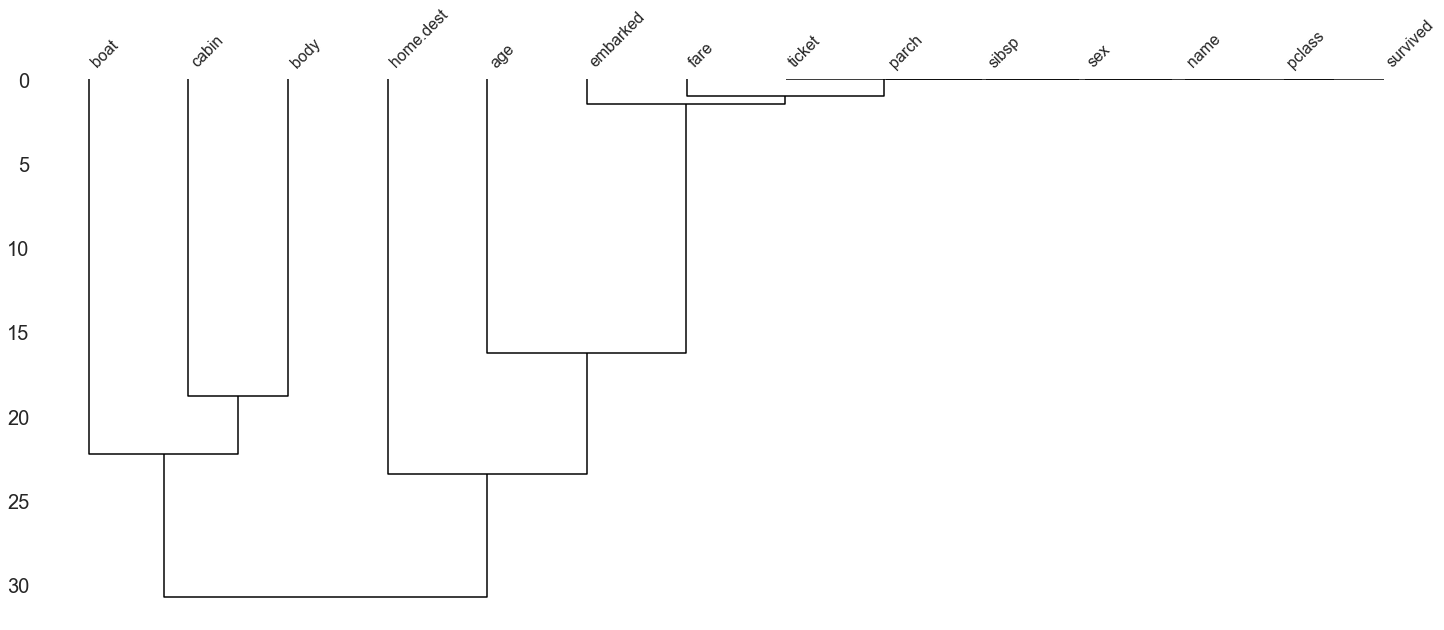

In [5]:
# used to get information about how close the relation is 
# it is hierarchical clustering in which the smaller the height more is the closeness 
msno.dendrogram(data)

In [6]:
#get info about the numeric values
numeric_features = data.select_dtypes(include=[np.number])

numeric_features.columns

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')

In [7]:
# info about different catorgies 
cat_features = data.select_dtypes(include =[np.object])
cat_features.columns

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')

In [8]:
# i will definately drop name and home.dest as almost half of the values are missing 
#and both of them are not the cause of anyones survival.

data.drop(['name','home.dest','body','ticket'],1,inplace=True)

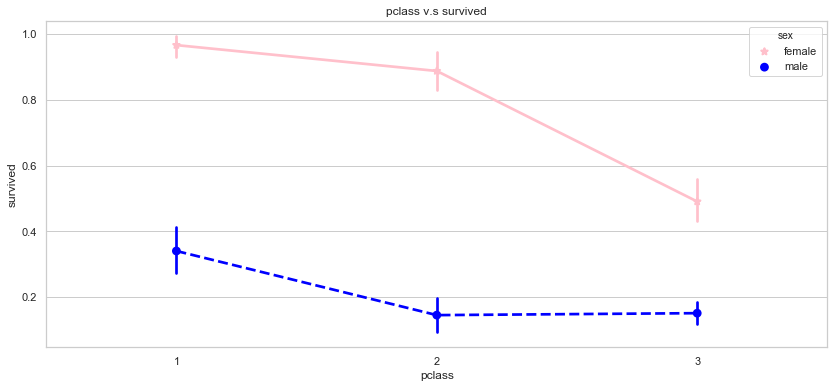

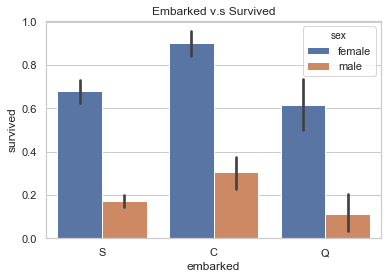

In [9]:
# now before droping any feild i will go thorough the data. 
# and check whether the data is meaningful or not. 

# EDA 
plt.figure(figsize=(14,6))
plt.figure(1);plt.title('pclass v.s survived')
sns.pointplot(x="pclass", y="survived", hue="sex", data=data,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"]);
plt.figure(2);plt.title('Embarked v.s Survived')
sns.barplot(x="embarked", y="survived", hue="sex", data=data,);


In [10]:
#sex is a very important box not to be droped . ... 

In [11]:
# percent of missing "Age" 
print('Percent of missing "Age" records is %.2f%%' %((data['age'].isnull().sum()/data.shape[0])*100))

Percent of missing "Age" records is 20.09%


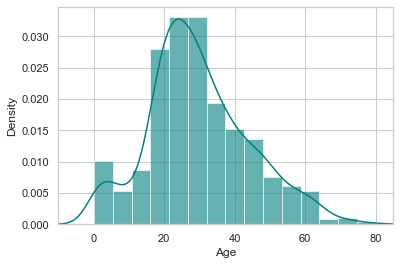

In [12]:
ax = data["age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [13]:
#y=data['age']
#plt.figure(1); plt.title('Johnson SU')
#sns.distplot(y,kde=False,fit=st.johnsonsu)
#plt.figure(2); plt.title('Normal')
#sns.distplot(y, kde=False, ftrain_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)it=st.norm)
#plt.figure(3); plt.title('Log Normal')
#sns.distplot(y, kde=False, fit=st.lognorm)

In [14]:
print((data['age'].median(skipna=True)))
print(data['age'].mean(skipna=True))
data_old = data.copy()
#Here we can see the age is left skewed and thus we will take median instead of mean 

28.0
29.8811345124283


In [15]:
data["age"].fillna(data["age"].median(skipna=True), inplace=True)

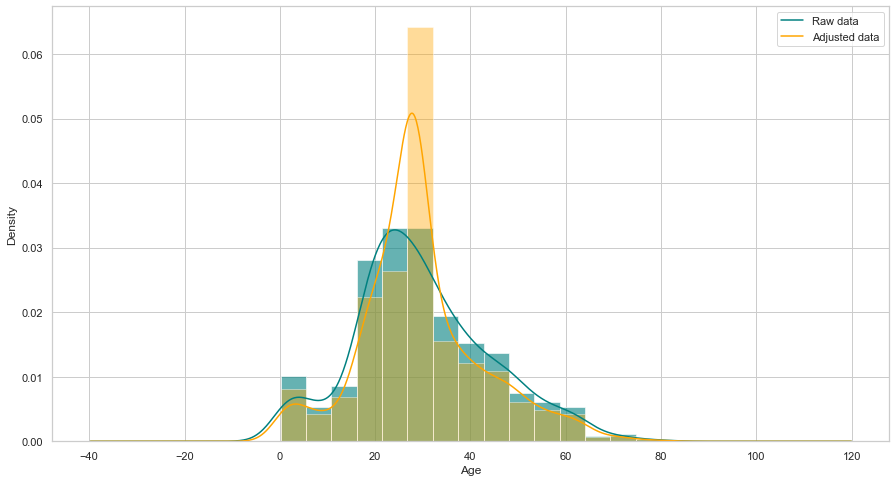

In [16]:
plt.figure(figsize=(15,8))
# data_old is the unadjusted data with left skewness.
ax = data_old['age'].hist(bins=15,density=True,stacked=True,color='teal',alpha=0.6)
data_old['age'].plot(kind='density',color='teal')
# data has been converted by inculcating the median in the original data thus having a normal distribution 
ax = data['age'].hist(bins=15,density=True,stacked=True,color='orange',alpha=0.4)
data['age'].plot(kind='density',color='orange')
ax.legend(['Raw data','Adjusted data'])
ax.set(xlabel = 'Age')

plt.show()

In [17]:
data.skew(); data.kurt();
print(data.skew(),data.kurt())

pclass     -0.598647
survived    0.486404
age         0.540984
sibsp       3.844220
parch       3.669078
fare        4.367709
dtype: float64 pclass      -1.315079
survived    -1.766112
age          0.969909
sibsp       20.043251
parch       21.541079
fare        27.027986
dtype: float64


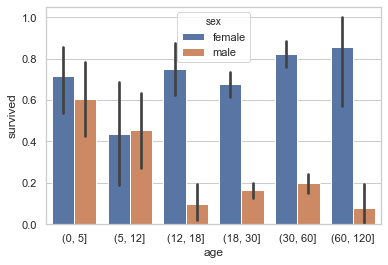

In [18]:
#so age is also important as 
bins = [0,5,12,18,30,60,120]
data['age'] = pd.cut(data['age'],bins)
sns.barplot(x="age",y="survived",hue="sex", data=data)


In [19]:
# age is also an important point . 
#though sex is more important than anything ... 
# now we will also go for the boat 
'''
if a pearson got boat he survived 
is it is unknow we will see whether he survived or not 
if survived we will assume he got a boat 
and then the data from that can also be taken for trainning 
'''

'\nif a pearson got boat he survived \nis it is unknow we will see whether he survived or not \nif survived we will assume he got a boat \nand then the data from that can also be taken for trainning \n'

In [20]:
print(data['survived'][:30]," ",data['boat'][:30])

0     1
1     1
2     0
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    1
12    1
13    1
14    1
15    0
16    0
17    1
18    1
19    0
20    1
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    1
Name: survived, dtype: int64   0       2
1      11
2     NaN
3     NaN
4     NaN
5       3
6      10
7     NaN
8       D
9     NaN
10    NaN
11      4
12      9
13      6
14      B
15    NaN
16    NaN
17      6
18      8
19      A
20      5
21      5
22      5
23      4
24      8
25    NaN
26      7
27      7
28      8
29      D
Name: boat, dtype: object


In [21]:
# I converted boat into 1 or 0 
# if got 1 if not 0
data['boat'] = np.where(pd.notnull(data['boat']),1,0)
print(data['boat'][:30])

0     1
1     1
2     0
3     0
4     0
5     1
6     1
7     0
8     1
9     0
10    0
11    1
12    1
13    1
14    1
15    0
16    0
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    0
26    1
27    1
28    1
29    1
Name: boat, dtype: int32


In [22]:
# sdb - srvived didn't have a boat 
#sb = survived with a boat
# did not survive even after having a boat 
sdb = 0
sb=0
dsb = 0

survive = data['survived'].values.tolist()
boat = data['boat'].values.tolist()
print(survive)
print(boat)
for i in range(len(survive)):
    if(survive[i] == 1 and boat[i] == 1):
        sb +=1
    elif(survive[i] == 1 and boat[i] != 1):
        sdb +=1
    else:
        #(data['survived'] is 0 and data['boat'] is 1):
        dsb +=1
print(sb,sdb,dsb)        

[1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 

In [23]:
data['boat'].isnull().sum()

0

In [24]:
#from the above hypothesis we conclude that know more feature enginnering can be done

In [25]:
#now embarkment will be taken 

print("percentage of missing data in embarked col. is %.2f%%"%((data['embarked'].isnull().sum()/data.shape[0])*100))

percentage of missing data in embarked col. is 0.15%


In [26]:
 print("the maximum embarkement place -- %s  "%(data['embarked'].value_counts().idxmax()))

the maximum embarkement place -- S  


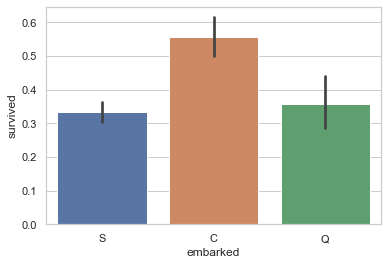

In [27]:
sns.barplot(x='embarked',y='survived',data=data)

In [28]:
#so from the above we find out that even though many people embaked on there journey from S yet
#people of C survived more. This can be an important factor in survival rate as the people of
#same area stay together .

In [29]:
# check for nan or null points in the sheet 
print(data.tail())
print(data[:30])
#data['cabin'].apply(lambda x : 'Unknown' if type(x)==float else x).astype(str)
#data['cabin'] = (data['cabin'].apply(lambda x : 'Unknown' if type(x)==float else x).astype(str)).apply(lambda x : x.split()[0][0])

      pclass  survived     sex       age  sibsp  parch     fare cabin  \
1304       3         0  female  (12, 18]      1      0  14.4542   NaN   
1305       3         0  female  (18, 30]      1      0  14.4542   NaN   
1306       3         0    male  (18, 30]      0      0   7.2250   NaN   
1307       3         0    male  (18, 30]      0      0   7.2250   NaN   
1308       3         0    male  (18, 30]      0      0   7.8750   NaN   

     embarked  boat  
1304        C     0  
1305        C     0  
1306        C     0  
1307        C     0  
1308        S     0  
    pclass  survived     sex        age  sibsp  parch      fare    cabin  \
0        1         1  female   (18, 30]      0      0  211.3375       B5   
1        1         1    male     (0, 5]      1      2  151.5500  C22 C26   
2        1         0  female     (0, 5]      1      2  151.5500  C22 C26   
3        1         0    male   (18, 30]      1      2  151.5500  C22 C26   
4        1         0  female   (18, 30]      1   

In [30]:
data["fare"].fillna(data["fare"].median(skipna=True), inplace=True)
data["embarked"].fillna(data['embarked'].value_counts().idxmax(), inplace=True)
data.drop('cabin',1,inplace=True)
data.head()[:10]

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,female,"(18, 30]",0,0,211.3375,S,1
1,1,1,male,"(0, 5]",1,2,151.5500,S,1
2,1,0,female,"(0, 5]",1,2,151.5500,S,0
3,1,0,male,"(18, 30]",1,2,151.5500,S,0
4,1,0,female,"(18, 30]",1,2,151.5500,S,0


In [31]:
print(data.isnull().sum())

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
boat        0
dtype: int64


In [32]:
from sklearn import preprocessing
def encode_features(df_train):
    features = ['fare','age', 'sex','embarked']
    #df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_train[feature])
        df_train[feature] = le.transform(df_train[feature])
        #df_test[feature] = le.transform(df_test[feature])
    return df_train
    
data = encode_features(data)
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,boat
0,1,1,0,3,0,0,273,2,1
1,1,1,1,0,1,2,270,2,1
2,1,0,0,0,1,2,270,2,0
3,1,0,1,3,1,2,270,2,0
4,1,0,0,3,1,2,270,2,0


survived    1.000000
fare        0.244265
parch       0.082660
sibsp      -0.027825
age        -0.055513
pclass     -0.312469
body             NaN
Name: survived, dtype: float64 

Index(['survived', 'fare', 'parch', 'sibsp', 'age', 'pclass'], dtype='object')


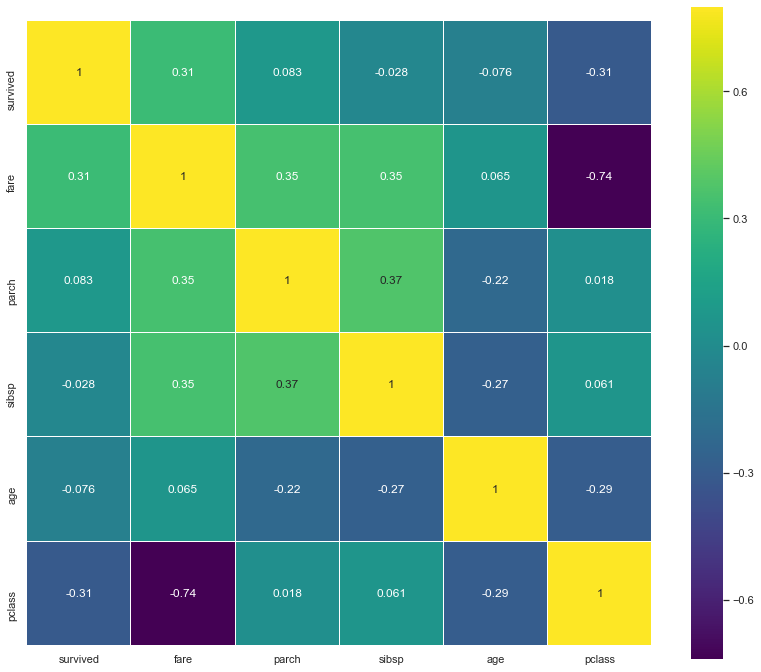

In [33]:
#using a heat map we will find the correlation of the current coloumns

correlation = numeric_features.corr()
print(correlation['survived'].sort_values(ascending = False),'\n')
k= 15
cols = correlation.nlargest(k,'survived')['survived'].index
print(cols)
cm = np.corrcoef(data[cols].values.T)
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

In [34]:
#not much can be determined from the above heatmap but we do get a hint that the
#parch and sibsp can be merged to get same results

In [35]:
## Create categorical variable for traveling alone
data['TravelAlone']=np.where((data["sibsp"]+data["parch"])>0, 0, 1)
data.drop('sibsp', axis=1, inplace=True)
data.drop('parch', axis=1, inplace=True)

In [36]:
data.head()

,pclass,survived,sex,age,fare,embarked,boat,TravelAlone
0,1,1,0,3,273,2,1,1
1,1,1,1,0,270,2,1,0
2,1,0,0,0,270,2,0,0
3,1,0,1,3,270,2,0,0
4,1,0,0,3,270,2,0,0


In [37]:
# some more EDA about age , trvelalone , embarked and fare 

In [38]:
#now we have cleaned all the data and are ready to feed the data into training and testing sets

In [39]:
#now we will go on the final step 

In [40]:
#Machine learning models from sklearn
from sklearn.naive_bayes import GaussianNB,MultinomialNB 
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split


In [41]:
X_all = data.drop(['survived'], axis=1)
y_all = data['survived']

num_test = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=num_test, random_state=23)

In [42]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(1047, 7) (1047,) (262, 7) (262,)


In [43]:
#creating a model 
clf = GaussianNB()
clf1 = MultinomialNB()
clf.fit(X_train, y_train)
clf1.fit(X_train,y_train)
#clf1.fit( , y_train)

#predicting values 
predicted_values = clf.predict(X_test)
accuracy = accuracy_score(y_test,predicted_values)
print("The accuracy of the model {}".format(accuracy*100))

#predicting values 
predicted_values_MNB = clf1.predict(X_test)
accuracy_MNB = accuracy_score(y_test,predicted_values_MNB)
print("The accuracy of the model {}".format(accuracy_MNB*100))

The accuracy of the model 98.47328244274809
The accuracy of the model 81.67938931297711


The confusion matrix of the model is 
[[162   1]
 [  3  96]]


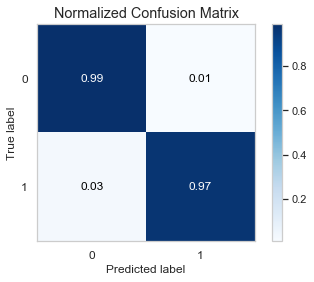

In [44]:
confusion_matrix = (confusion_matrix(y_test,predicted_values))

print("The confusion matrix of the model is \n{}".format(confusion_matrix))
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,predicted_values, normalize=True)
plt.show()

In [45]:
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

c:\users\flash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\flash\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


,Algorithms,Percentage
0,Linear Regression,98.473282
1,Logistics Regression,98.473282
2,NaiveBayes_Multinomial,81.679389
3,KNearest,81.679389
4,NaiveBayes_Gaussian,98.473282
5,DecisionTree,98.091603
6,Support Vector Machine,90.458015
7,RandomForest,98.854962
8,MultiNeuralNetwork,98.473282


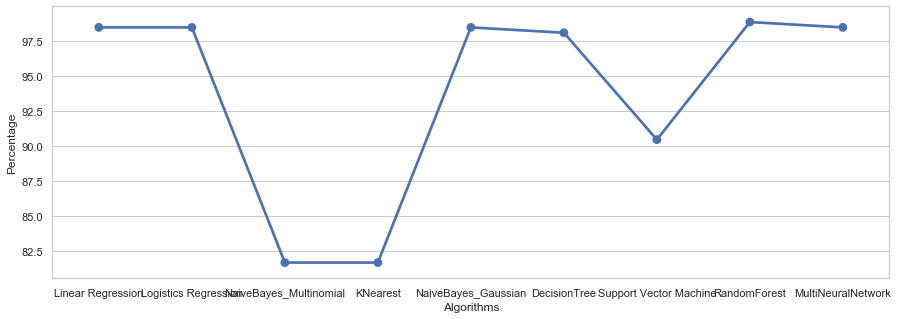

In [46]:
from sklearn.linear_model import LinearRegression
#creating models
#Building the model
#Naive bayes,Random-forest,SVM,DecisionTree,NeuralNetwork,KNN
logreg = LogisticRegression().fit(X_train,y_train)
LR = LinearRegression().fit(X_train, y_train)
NB_M=MultinomialNB().fit(X_train, y_train)
GB = GaussianNB().fit(X_train, y_train)
KNN=KNeighborsClassifier().fit(X_train, y_train)
DT=DecisionTreeClassifier().fit(X_train, y_train)
SVM = svm.SVC().fit(X_train, y_train)
RF = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456).fit(X_train, y_train)
MLP = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1).fit(X_train, y_train)

#predicting with various Models and testing their Accuracy
predicted_values_LOR = logreg.predict(X_test)
predicted_values_LR = LR.predict(X_test)
predicted_values_NBM = NB_M.predict(X_test)
predicted_values_GB=GB.predict(X_test)
predicted_values_KNN = KNN.predict(X_test)
predicted_values_DT = DT.predict(X_test)
predicted_values_SVM = SVM.predict(X_test)
predicted_values_RF = RF.predict(X_test)
predicted_values_MLP = MLP.predict(X_test)

#Testing the accuracy of each model 
predictions=dict()

predicted_values_LR[predicted_values_LR > .5] = 1
predicted_values_LR[predicted_values_LR <=.5] = 0
accuracy_LR=accuracy_score(y_test,predicted_values_LR)
predictions['Linear Regression']=accuracy_LR*100
accuracy_LOR=accuracy_score(y_test,predicted_values_LOR)
predictions['Logistics Regression']=accuracy_LOR*100
acurracy_NB_M = accuracy_score(y_test,predicted_values_NBM)
predictions['NaiveBayes_Multinomial']=acurracy_NB_M*100
acurracy_KNN = accuracy_score(y_test,predicted_values_KNN)
predictions['KNearest']=acurracy_KNN*100
accuracy_NB_GM=accuracy_score(y_test,predicted_values_GB)
predictions['NaiveBayes_Gaussian']=accuracy_NB_GM*100
acurracy_DT = accuracy_score(y_test,predicted_values_DT)
predictions['DecisionTree']=acurracy_DT*100
acurracy_SVM = accuracy_score(y_test,predicted_values_SVM)
predictions['Support Vector Machine']=acurracy_SVM*100
acurracy_RF = accuracy_score(y_test,predicted_values_RF)
predictions['RandomForest']=acurracy_RF*100
acurracy_MLP = accuracy_score(y_test,predicted_values_MLP)
predictions['MultiNeuralNetwork']=acurracy_MLP*100
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
df=pd.DataFrame(list(predictions.items()),columns=['Algorithms','Percentage'])
display(df)
sns.pointplot(x="Algorithms", y="Percentage", data=df,ax=ax1);
plt.show()